In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [2]:
training_data = pd.read_csv(r'C:\Users\divya\Downloads\churn-bigml-80.csv') 
test_data = pd.read_csv(r'C:\Users\divya\Downloads\churn-bigml-20.csv') 

In [3]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

<AxesSubplot:>

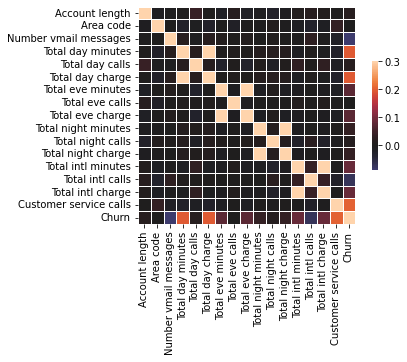

In [5]:
corr = training_data.corr()
sns.heatmap(corr, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [6]:
# State!    Account length    Area code-    International plan!    Voice mail plan-    Number vmail messages    Total day minutes-    Total day calls    Total day charge    Total eve minutes-    Total eve calls    Total eve charge    Total night minutes-    Total night calls    Total night charge    Total intl minutes-    Total intl calls    Total intl charge    Customer service calls    Churn
# training_data.loc[:,['State','International plan']] = training_data.loc[:,['State','International plan']].astype('category')
# test_data.loc[:,['State','International plan']] = test_data.loc[:,['State','International plan']].astype('category')

training_data = pd.get_dummies(training_data, columns = ['International plan'])
test_data = pd.get_dummies(test_data, columns = ['International plan']) 

In [7]:
training_data.head()

,State,Account length,Area code,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,International plan_No,International plan_Yes
0,KS,128,415,Yes,25,265.1,110,45.07,197.4,99,...,244.7,91,11.01,10.0,3,2.70,1,False,1,0
1,OH,107,415,Yes,26,161.6,123,27.47,195.5,103,...,254.4,103,11.45,13.7,3,3.70,1,False,1,0
2,NJ,137,415,No,0,243.4,114,41.38,121.2,110,...,162.6,104,7.32,12.2,5,3.29,0,False,1,0
3,OH,84,408,No,0,299.4,71,50.90,61.9,88,...,196.9,89,8.86,6.6,7,1.78,2,False,0,1
4,OK,75,415,No,0,166.7,113,28.34,148.3,122,...,186.9,121,8.41,10.1,3,2.73,3,False,0,1


In [8]:
cols = ['Account length', 'International plan_No', 'International plan_Yes', 'Number vmail messages' ,'Total day calls' ,'Total day charge' ,'Total eve calls' ,'Total eve charge', 'Total night calls' ,'Total night charge' ,'Total intl calls' ,'Total intl charge' ,'Customer service calls' ,'Churn']

In [9]:
"""
Model evaluation across multiple classifiers based on accuracy of predictions.
"""
classifiers = [
#     KNeighborsClassifier(3),
#     LinearSVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LogisticRegression()]

acc_dict = {}

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

# for train_index, test_index in sss.split(X, y):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

X_train, y_train = training_data[cols[:-1]], training_data[cols[-1]]
X_test, y_test = test_data[cols[:-1]], test_data[cols[-1]]

for clf in classifiers:
    name = clf.__class__.__name__
    print(name)
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    if name in acc_dict:
        acc_dict[name] += (acc/10.0)
    else:
        acc_dict[name] = (acc/10.0)

DecisionTreeClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
GaussianNB
LogisticRegression


C:\Users\divya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
print(acc_dict)

{'DecisionTreeClassifier': 0.09100449775112443, 'RandomForestClassifier': 0.0944527736131934, 'AdaBoostClassifier': 0.08875562218890555, 'GradientBoostingClassifier': 0.09490254872563718, 'GaussianNB': 0.08350824587706147, 'LogisticRegression': 0.08515742128935531}


In [12]:
acc_dict

{'DecisionTreeClassifier': 0.09100449775112443,
 'RandomForestClassifier': 0.0944527736131934,
 'AdaBoostClassifier': 0.08875562218890555,
 'GradientBoostingClassifier': 0.09490254872563718,
 'GaussianNB': 0.08350824587706147,
 'LogisticRegression': 0.08515742128935531}